# Análise Macro - IPCA

Obtendo e visualizando dados relativos ao IPCA.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,5)
sns.set()

## IPCA - Variação Mensal

In [159]:
url = 'https://apisidra.ibge.gov.br/values/t/7061/n1/all/v/306/p/all/c315/7169,7170,7445,7486,7558,7625,7660,7712,7766,7786/d/v306%202'

In [160]:
ipca_val = pd.read_json(url)
ipca_val = ipca_val[['D3C','D4N','V']]
ipca_val.columns = ['Mês','Var','Valor']
ipca_val = ipca_val[1:]

In [161]:
ipca_val['Mês'] = pd.to_datetime(ipca_val['Mês'],format='%Y%m')
ipca_val.set_index('Mês',drop=True,inplace=True)
ipca_val['Valor'] = ipca_val['Valor'].astype(float)
ipca_val = ipca_val.pivot(columns='Var',values='Valor')

In [162]:
ipca_val.head()

Var,1.Alimentação e bebidas,2.Habitação,3.Artigos de residência,4.Vestuário,5.Transportes,6.Saúde e cuidados pessoais,7.Despesas pessoais,8.Educação,9.Comunicação,Índice geral
Mês,,,,,,,,,,
2020-01-01,0.08,0.55,-0.07,-0.48,0.32,-0.32,0.35,0.16,0.12,0.15
2020-02-01,0.16,-0.39,-0.08,-0.73,-0.23,0.73,0.31,3.70,0.21,0.26
2020-03-01,0.84,0.13,-1.08,0.21,-0.90,0.21,-0.23,0.59,0.04,0.01
2020-04-01,1.57,-0.10,-1.37,0.10,-2.66,-0.22,-0.14,0.00,-0.20,-0.35
2020-05-01,0.33,-0.25,0.58,-0.58,-1.90,-0.10,-0.04,0.02,0.24,-0.36


In [163]:
#ipca_val.info()

### Variação Mensal dos Grupos:

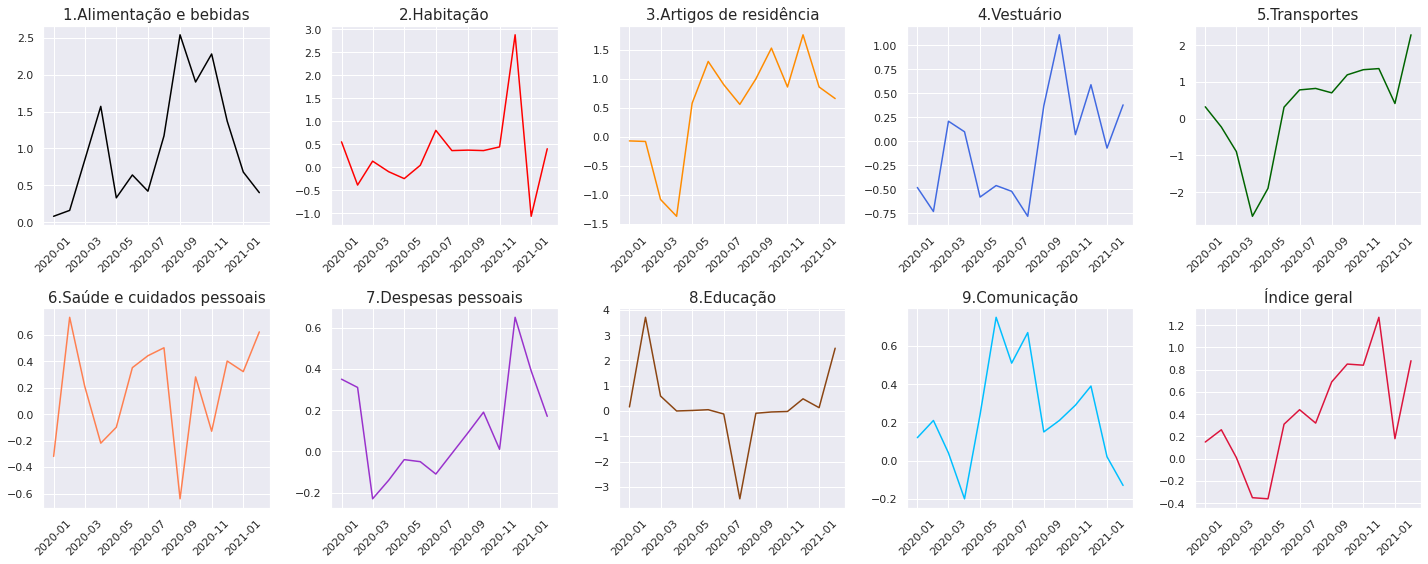

In [164]:
f = plt.figure(figsize=(20,8))
#f.suptitle('Variação Mensal dos Componentes do IPCA', fontsize=16)
colors = ['black','red','darkorange','royalblue','darkgreen','coral','darkorchid','saddlebrown','deepskyblue','crimson']
for i,n in enumerate(ipca_val.columns):
  fitem = f.add_subplot(2, 5, i+1)
  plt.plot(ipca_val[n],color=colors[i]) 
  plt.title(n,fontsize=15)
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Pesos:

In [100]:
url = 'https://apisidra.ibge.gov.br/values/t/7061/n1/all/v/309/p/all/c315/7169,7170,7445,7486,7558,7625,7660,7712,7766,7786/d/v309%204'

In [101]:
ipca_pesos = pd.read_json(url)
ipca_pesos = ipca_pesos[['D3C','D4N','V']]
ipca_pesos.columns = ['Mês','Var','Valor']
ipca_pesos = ipca_pesos[1:]

In [102]:
ipca_pesos['Mês'] = pd.to_datetime(ipca_pesos['Mês'],format='%Y%m')
ipca_pesos.set_index('Mês',drop=True,inplace=True)
ipca_pesos['Valor'] = ipca_pesos['Valor'].astype(float)
ipca_pesos = ipca_pesos.pivot(columns='Var',values='Valor')

In [103]:
ipca_pesos.head()

Var,1.Alimentação e bebidas,2.Habitação,3.Artigos de residência,4.Vestuário,5.Transportes,6.Saúde e cuidados pessoais,7.Despesas pessoais,8.Educação,9.Comunicação,Índice geral
Mês,,,,,,,,,,
2020-01-01,19.3483,15.5945,3.7529,4.5770,20.5979,13.5334,10.7330,6.1485,5.7146,100.0
2020-02-01,19.3338,15.6555,3.7446,4.5482,20.6337,13.4694,10.7536,6.1483,5.7129,100.0
2020-03-01,19.3156,15.5546,3.7316,4.5032,20.5350,13.5317,10.7590,6.3589,5.7104,100.0
2020-04-01,19.4758,15.5706,3.6913,4.5125,20.3507,13.5581,10.7340,6.3955,5.7114,100.0
2020-05-01,19.8515,15.6086,3.6542,4.5335,19.8827,13.5737,10.7581,6.4187,5.7191,100.0


### Composição Mensal dos Pesos:

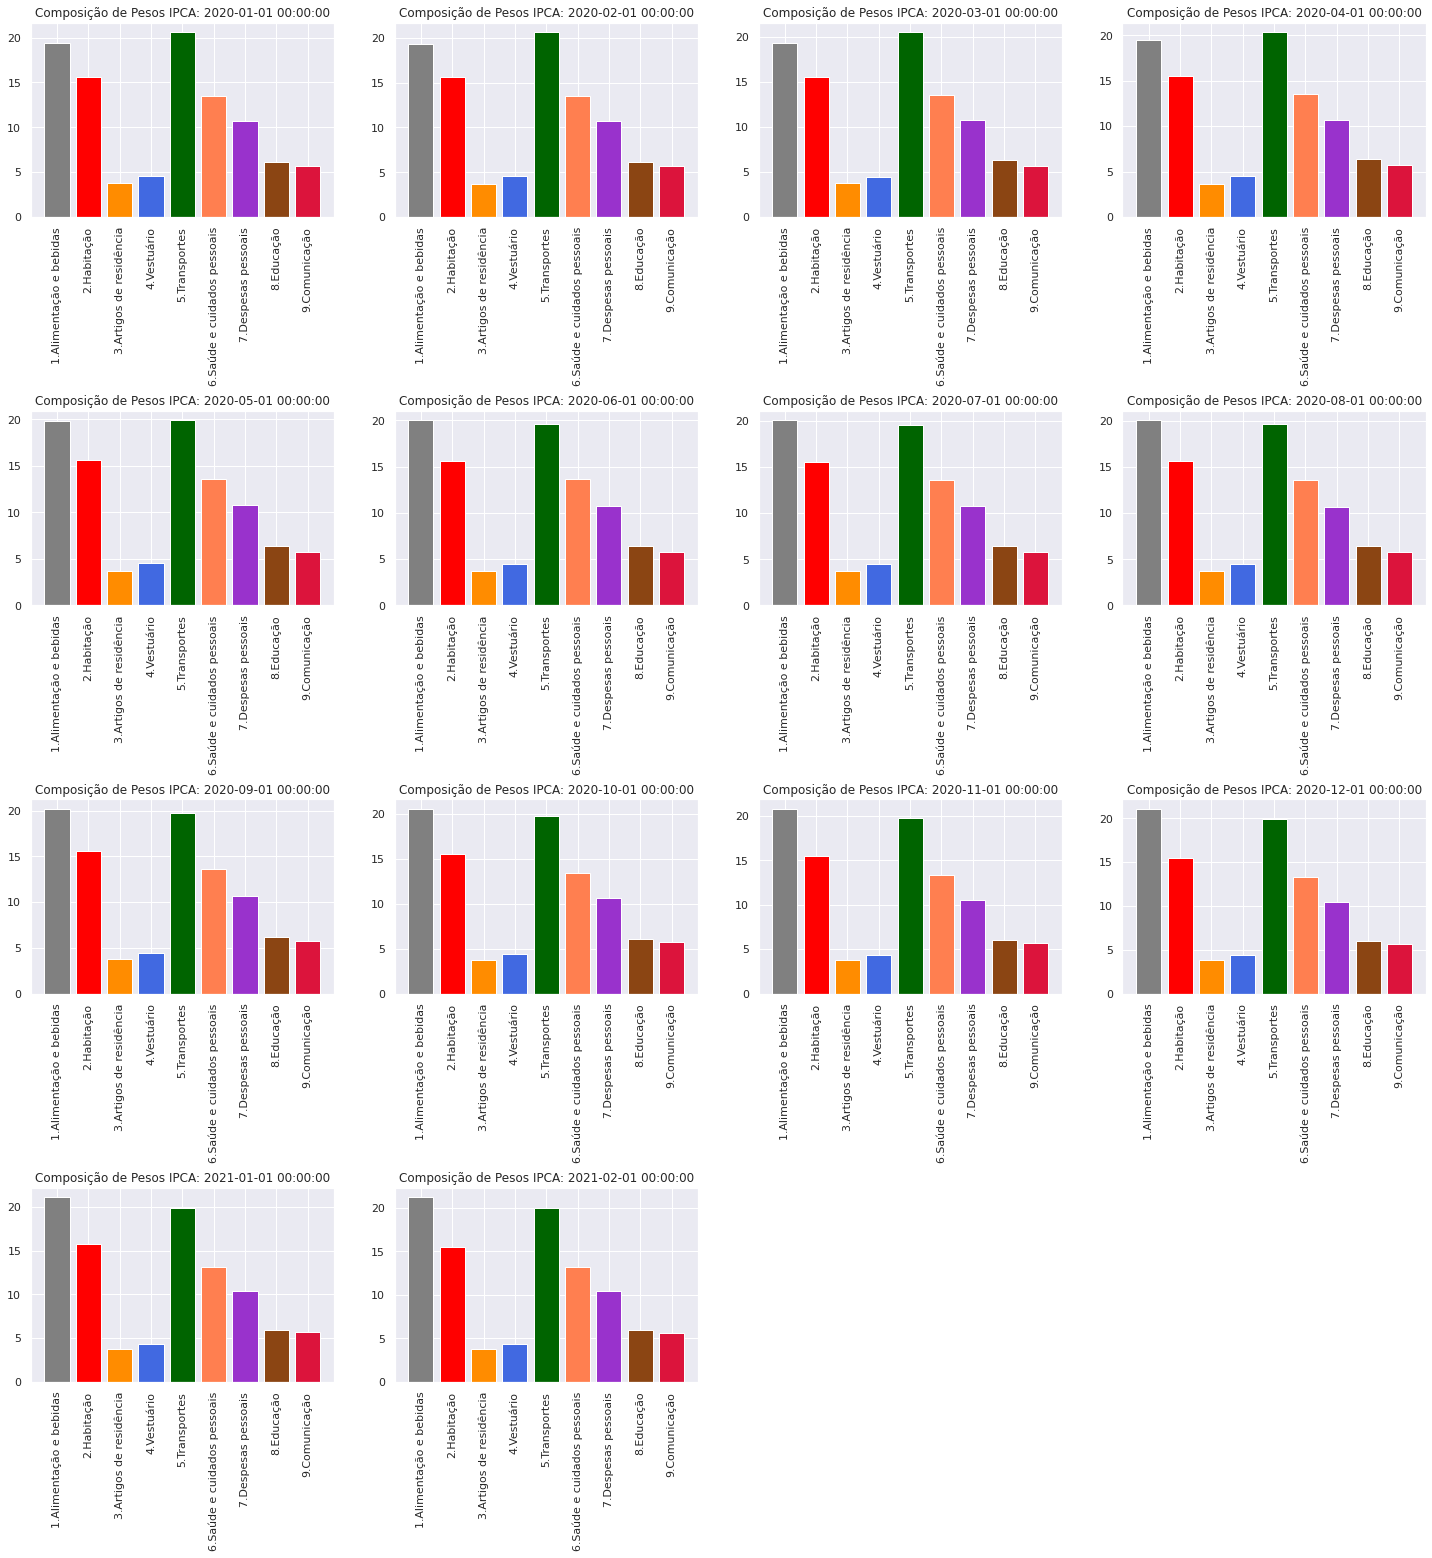

In [282]:
f = plt.figure(figsize=(25,25))
labels = []
lines = []
colors = ['grey','red','darkorange','royalblue','darkgreen','coral','darkorchid','saddlebrown','crimson']
for n,i in enumerate(ipca_pesos.index):
  fi = f.add_subplot(4,4,n+1)
  fi.bar(ipca_pesos.columns[:-1],ipca_pesos.loc[i][:-1],color=colors)
  plt.title('Composição de Pesos IPCA: {}'.format(ipca_pesos.index[n]))
  plt.xticks(rotation=90)
  #plt.tight_layout
plt.subplots_adjust(  
                    hspace=1)
plt.show()

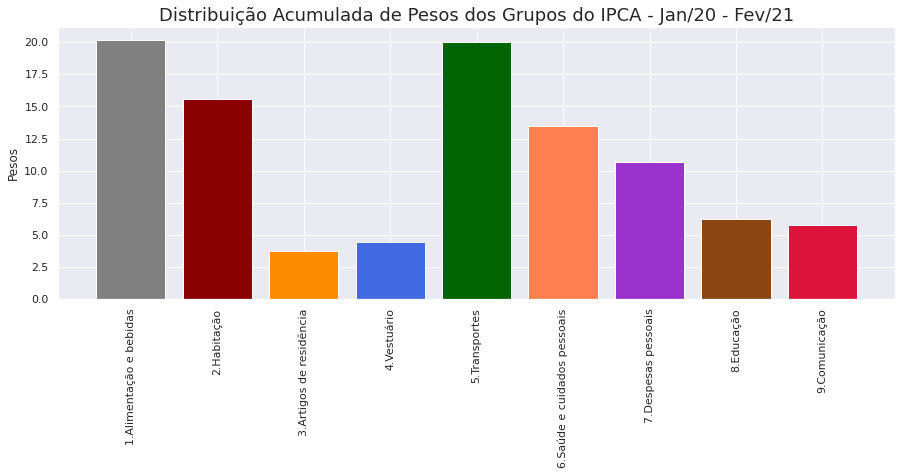

In [271]:
plt.bar(ipca_pesos.columns[0:-1],height=ipca_pesos.iloc[:,0:-1].sum()/len(ipca_pesos.index),
        color = ['grey','darkred','darkorange','royalblue',
                'darkgreen','coral','darkorchid','saddlebrown','crimson'])
plt.title('Distribuição Acumulada de Pesos dos Grupos do IPCA - Jan/20 - Fev/21',fontsize=18)
plt.ylabel('Pesos',fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Variação Mensal:

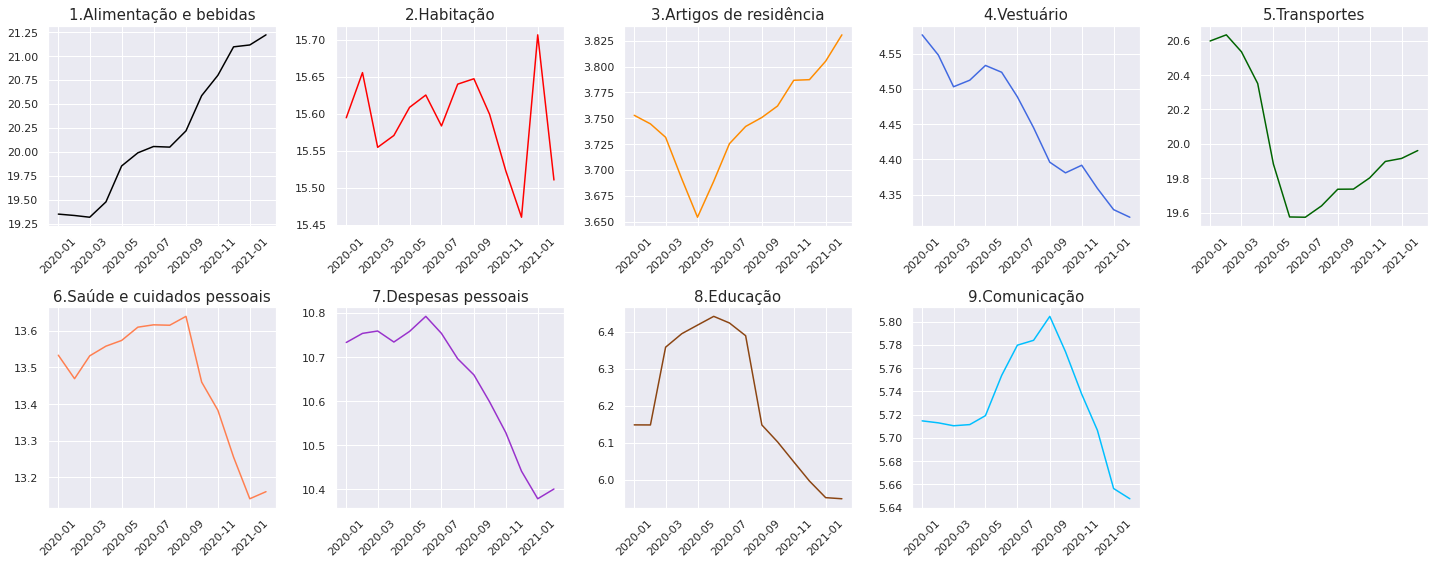

In [200]:
f = plt.figure(figsize=(20,8))
#f.suptitle('Variação Mensal dos Pesos Componentes do IPCA', fontsize=16)
colors = ['black','red','darkorange','royalblue','darkgreen','coral','darkorchid','saddlebrown','deepskyblue','crimson']
for i,n in enumerate(ipca_pesos.columns[:-1]):
  fitem = f.add_subplot(2, 5, i+1)
  plt.plot(ipca_pesos[n],color=colors[i]) 
  plt.title(n,fontsize=15)
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Inflação Classificações BACEN:

In [286]:
# Função para obter dados do API do BCB

def bc_getdata(codigo):
  link = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
  df = pd.read_json(link)
  df['data'] = pd.to_datetime(df['data'],dayfirst=True)
  df.set_index('data',drop=True,inplace=True)
  #df = df['valor']
  return df

In [284]:
codigos = [4447,4448,4449,10841,10842,10843,10844,11428]
# 4447 - Índice nacional de preços ao consumidor-Amplo (IPCA) - Comercializáveis
# 4448 - Índice de Preços ao Consumidor-Amplo (IPCA) - Não comercializáveis
# 4449 - Índice Nacional de Preços ao Consumidor - Amplo (IPCA) - Monitorados
# 10841 - Índice de Preços ao Consumidor-Amplo (IPCA) - Bens não-duráveis
# 10842 - Índice de Preços ao Consumidor-Amplo (IPCA) - Bens semi-duráveis
# 10843 - Índice de Preços ao Consumidor-Amplo (IPCA) - Duráveis
# 10844 - Índice Nacional de Preços ao Consumidor - Amplo (IPCA) - Serviços
# 11428 Índice nacional de preços ao consumidor - Amplo (IPCA) - Itens livres

In [287]:
ipca_bacen = pd.DataFrame()
for c in codigos:
  ipca_bacen[c] = bc_getdata(c)['valor']
  ipca_bacen = ipca_bacen[ipca_bacen.index >= '2010-01-01 00:00:00']

In [288]:
ipca_bacen.columns = ['Comercializáveis','Não Comercializáveis','Monitorados',
                         'Bens não-duráveis','Bens semi-duráveis','Duráveis',
                         'Serviços','Itens Livres']

### Variações Mensais:

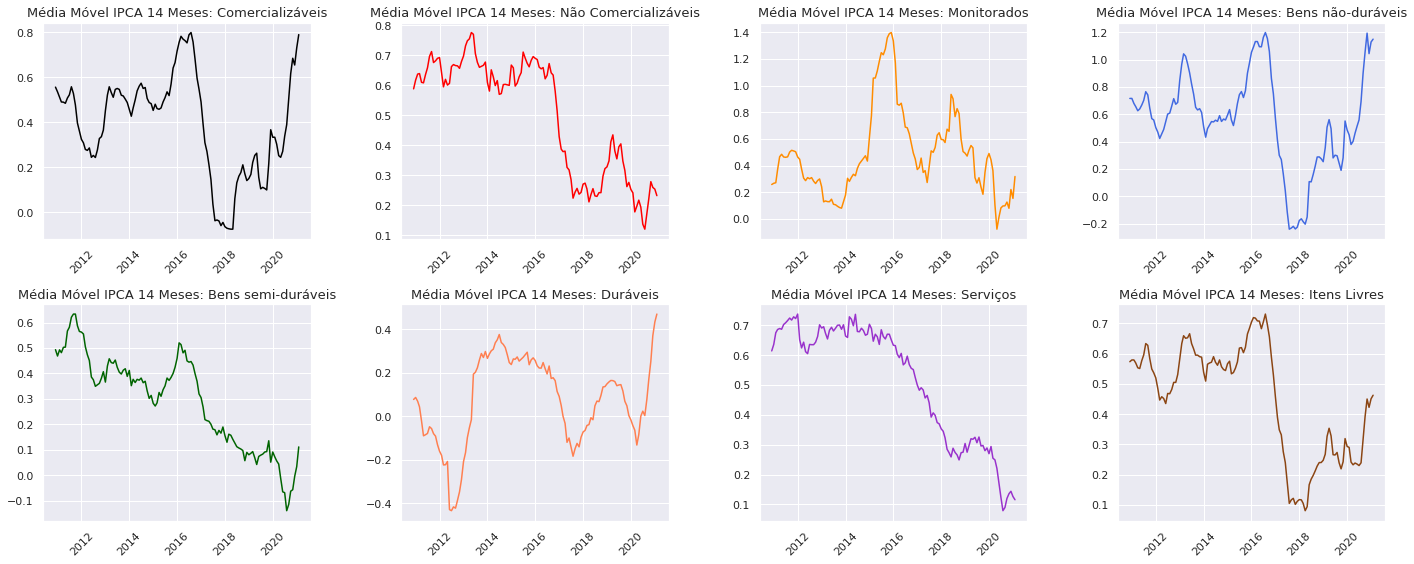

In [290]:
f = plt.figure(figsize=(20,8))
#f.suptitle('Variação Mensal dos Pesos Componentes do IPCA', fontsize=16)
colors = ['black','red','darkorange','royalblue','darkgreen','coral','darkorchid','saddlebrown','deepskyblue','crimson']
for i,n in enumerate(ipca_bacen.columns):
  fitem = f.add_subplot(2, 4, i+1)
  plt.plot(ipca_bacen[n].rolling(12).mean(),color=colors[i]) 
  plt.title('Média Móvel IPCA 14 Meses: '+n,fontsize=13)
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Núcleos de Inflação BACEN:

In [101]:
codigos = (4466,11426,11427,16121,16122,27838,27839)
# 4466 - Índice nacional de preços ao consumidor-Amplo (IPCA) - Núcleo médias aparadas com suavização
# 11426 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo médias aparadas sem suavização
# 11427 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX0
# 16121 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX1
# 16122 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo de dupla ponderação
# 27838 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX2
# 27839 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX3

In [102]:
ipca_nucleos = pd.DataFrame()
for c in codigos:
  ipca_nucleos[c] = bc_getdata(c)['valor']
  ipca_nucleos = ipca_nucleos[ipca_nucleos.index >= '2010-01-01 00:00:00']

In [103]:
ipca_bcb = bc_getdata(433)

In [ ]:
ipca_bcb[ipca_bcb.index >= '2010-01-01 00:00:00']

In [105]:
ipca_nucleos['Média'] = round(ipca_nucleos.mean(axis=1),4)

In [106]:
ipca_meta = bc_getdata(13521)

In [107]:
ipca_meta = ipca_meta[ipca_meta.index <= '2022-01-01 00:00:00']

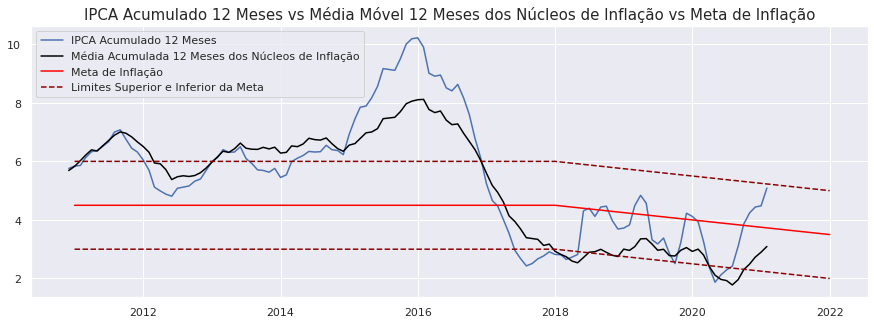

In [108]:
plt.plot(ipca_bcb[ipca_bcb.index >= '2010-01-01 00:00:00']['valor'].rolling(12).sum(),label='IPCA Acumulado 12 Meses')
plt.plot(ipca_nucleos['Média'][ipca_nucleos.index >= '2010-01-01 00:00:00'].rolling(12).sum(),color='black',label='Média Acumulada 12 Meses dos Núcleos de Inflação')
plt.plot(ipca_meta[ipca_meta.index >= '2011-01-01 00:00:00']['valor'],color='red',label='Meta de Inflação')
plt.plot(ipca_meta[ipca_meta.index >= '2011-01-01 00:00:00']['valor']+1.5,ls='--',color='darkred',label='Limites Superior e Inferior da Meta')
plt.plot(ipca_meta[ipca_meta.index >= '2011-01-01 00:00:00']['valor']-1.5,ls='--',color='darkred')
plt.title('IPCA Acumulado 12 Meses vs Média Móvel 12 Meses dos Núcleos de Inflação vs Meta de Inflação',fontsize=15)
plt.legend(loc='upper left')
plt.show()

## Índice de Difusão IPCA:

In [109]:
ipca_dif = bc_getdata(21379)

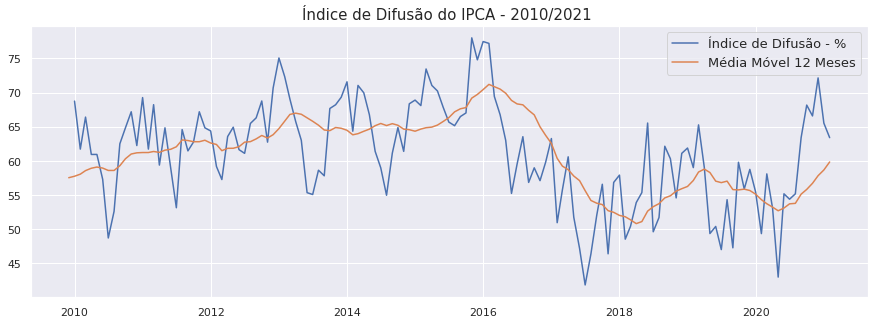

In [113]:
plt.plot(ipca_dif[ipca_dif.index >= '2010-01-01 00:00:00'],label='Índice de Difusão - %')
plt.plot(ipca_dif[ipca_dif.index >= '2009-01-01 00:00:00'].rolling(12).mean(),label='Média Móvel 12 Meses')
plt.title('Índice de Difusão do IPCA - 2010/2021 ',fontsize=15)
plt.legend(fontsize=13)
plt.show()

## Inflação por Faixas de Renda:

In [3]:
url = 'http://www.ipea.gov.br/cartadeconjuntura/wp-content/uploads/2021/03/210316_cc_50_nota_21_inflacao_por_faixa_de_renda_tabela.xlsx'

In [85]:
ipea_renda = pd.read_excel(url,skiprows=4,header=0)

In [86]:
ipea_renda.drop(ipea_renda.index[-1],inplace=True)

In [87]:
ipea_renda.columns = ['Mês','Renda Muito Baixa','Renda Baixa','Renda Média-Baixa','Renda Média','Renda Média-Alta','Renda Alta']

In [99]:
ipea_renda.head()

,Renda Muito Baixa,Renda Baixa,Renda Média-Baixa,Renda Média,Renda Média-Alta,Renda Alta
Mês,,,,,,
2006-07-01,0.068795,0.095983,0.112550,0.143487,0.161637,0.190299
2006-08-01,-0.012428,0.000182,0.006135,0.005555,-0.001066,-0.218029
2006-09-01,0.237790,0.244530,0.224924,0.228291,0.204228,0.045648
2006-10-01,0.589476,0.507814,0.464574,0.377531,0.287329,0.237443
2006-11-01,0.729772,0.577165,0.512432,0.370967,0.268429,0.238138


In [88]:
meses_in = ['Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun',]

In [89]:
datas = []
for line,m in zip(ipea_renda['Mês'],meses_in*len(ipea_renda['Mês'])):
  l = line.split('/')
  datas.append(m+'/'+l[1])
  #print(m+'/'+l[1])
  #ipea_renda['Mês'] = m+'/'+l[1]
ipea_renda['Mês'] = datas

In [91]:
ipea_renda['Mês'] = pd.to_datetime(ipea_renda['Mês'],format='%b/%Y')
ipea_renda.set_index('Mês',drop=True,inplace=True)

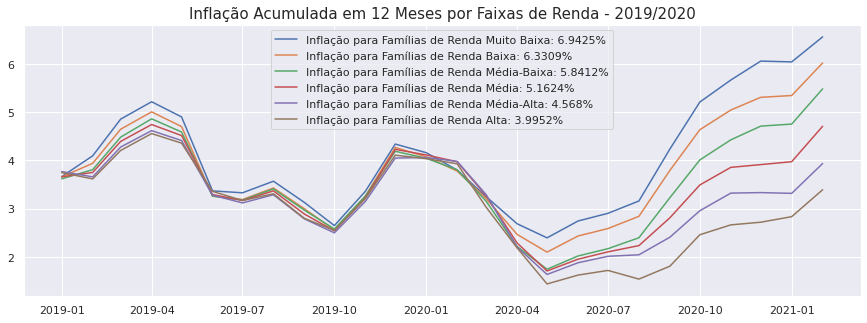

In [98]:
for grupo in ipea_renda.columns:
  plt.plot(ipea_renda[ipea_renda.index > '2018-01-01'][grupo].rolling(12).sum(),label='Inflação para Famílias de {}: {}%'.format(grupo,round(ipea_renda[ipea_renda.index >= '2020-01-01'][grupo].cumsum()[-1],4)))
plt.title('Inflação Acumulada em 12 Meses por Faixas de Renda - 2019/2020',fontsize=15)
plt.legend()
plt.show()

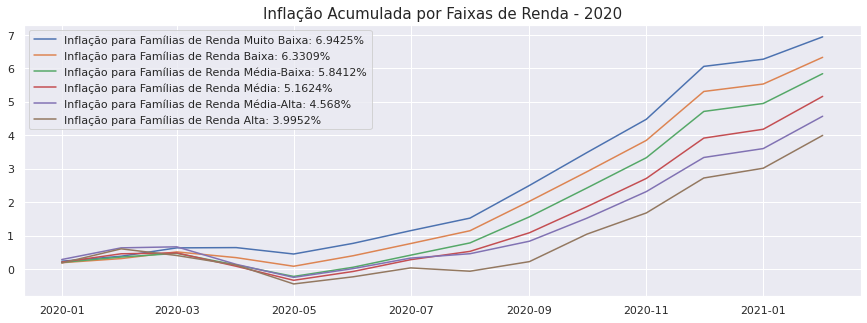

In [97]:
for grupo in ipea_renda.columns:
  plt.plot(ipea_renda[ipea_renda.index >= '2020-01-01'][grupo].cumsum(),label='Inflação para Famílias de {}: {}%'.format(grupo,round(ipea_renda[ipea_renda.index >= '2020-01-01'][grupo].cumsum()[-1],4)))
plt.title('Inflação Acumulada por Faixas de Renda - 2020',fontsize=15)
plt.legend()
plt.show()